In [81]:
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
from datetime import datetime  
from datetime import timedelta

C:\Users\warch\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [99]:
JB = pd.read_csv('./data/Lonely (with benny blanco)_incremental.csv')
series1 = JB['us']
series1.index = pd.to_datetime(JB['date'])
series1

date
2020-10-13         0
2020-10-14         0
2020-10-15         0
2020-10-16    964623
2020-10-17    719790
               ...  
2021-04-12    232824
2021-04-13    229428
2021-04-14    229968
2021-04-15    237418
2021-04-16    246129
Name: us, Length: 186, dtype: int64

In [124]:
def Arima_predict(dataset, test = True, periods_n = 60):
    if test:
        train = dataset[:int(len(dataset)*0.75)]
        test_data = dataset[int(len(dataset)*0.75):]
    else: 
        last_date = dataset.index[-1]
        indexes = [last_date + timedelta(days=i) for i in range(periods_n)]
    model = pm.auto_arima(train if test else dataset, start_p=0, d=1, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, max_d=5, # maximum p and q and d
                      m=12,              # frequency of series          
                      seasonal=True,
                      start_P=0, 
                      start_Q=0,
                      max_P=5, max_D=5, max_Q=5,
                      D=1, 
                      trace=True,
                      error_action='warn',  
                      suppress_warnings=True, 
                      stepwise=True,
                      random_state=20,
                      n_fits=50)
    print(model.summary())
    prediction = model.predict(n_periods=len(test_data) if test else periods_n)
    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    if test:
        plt.plot(train, label='training')
        plt.plot(test_data, label='actual')
    else:
        plt.plot(dataset, label = 'actual')
    plt.plot(pd.DataFrame(prediction,index = test_data.index if test else indexes), label='forecast')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3303.661, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3248.155, Time=0.26 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3204.580, Time=0.27 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3340.582, Time=0.07 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3206.357, Time=0.45 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3206.363, Time=0.83 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3234.648, Time=0.22 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3208.351, Time=2.34 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3224.033, Time=0.21 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=3205.648, Time=0.40 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=3206.614, Time=0.35 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=3236.837, Time=0.24 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=3207.972, Time=0.64 sec
 ARIMA(0,1,1)(0,1,1)[12] intercept   : AIC=3206.903, Time=0.33 sec

Best model:  ARIMA

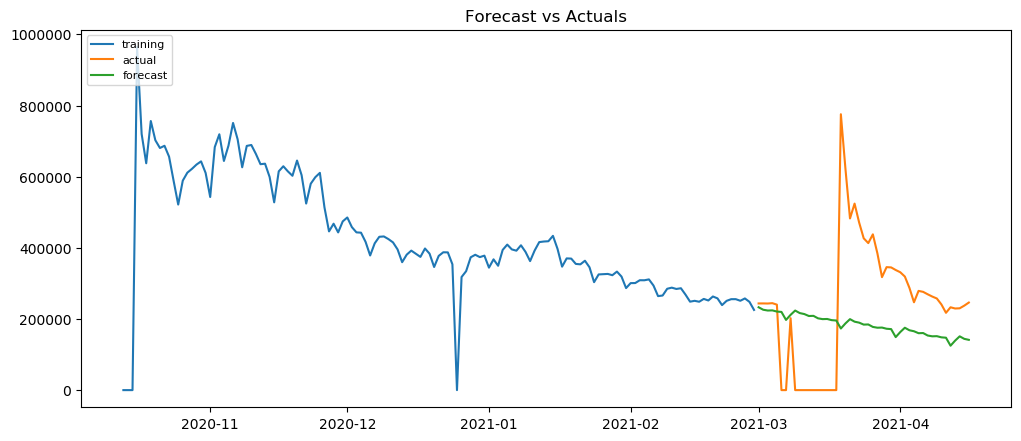

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4593.136, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4530.537, Time=0.21 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4484.329, Time=0.35 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4591.324, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4486.028, Time=0.49 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4485.983, Time=1.36 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4514.503, Time=0.30 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4487.444, Time=3.45 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=4484.192, Time=0.26 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=4485.961, Time=0.39 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=4485.844, Time=1.37 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4522.920, Time=0.20 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=4487.447, Time=2.10 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=4509.756, Time=0.28 sec
 ARIMA(1,1,1)(0,1,1

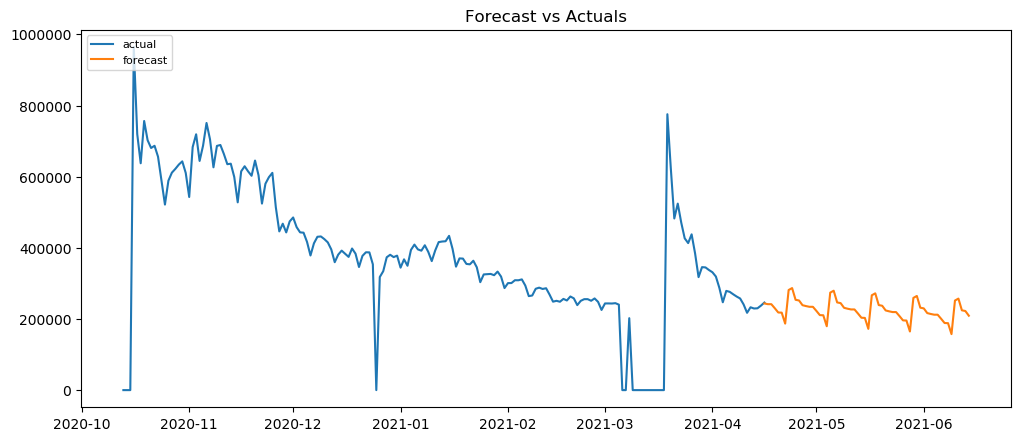

In [129]:
JB = pd.read_csv('./data/Lonely (with benny blanco)_incremental.csv')
series1 = JB['us']
series1.index = pd.to_datetime(JB['date'])
Arima_predict(series1)
Arima_predict(series1,test = False)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4618.299, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4568.856, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=4543.345, Time=0.31 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4619.039, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=4542.895, Time=0.42 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4569.842, Time=0.27 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=4544.562, Time=2.24 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=4544.558, Time=2.23 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=4542.634, Time=0.90 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=4544.566, Time=1.69 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=4545.626, Time=3.65 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=1.88 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=4543.546, Time=2.13 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=4512.212, Time=1.14 sec
 ARIMA(0,1,2)(0,1,1)[12]

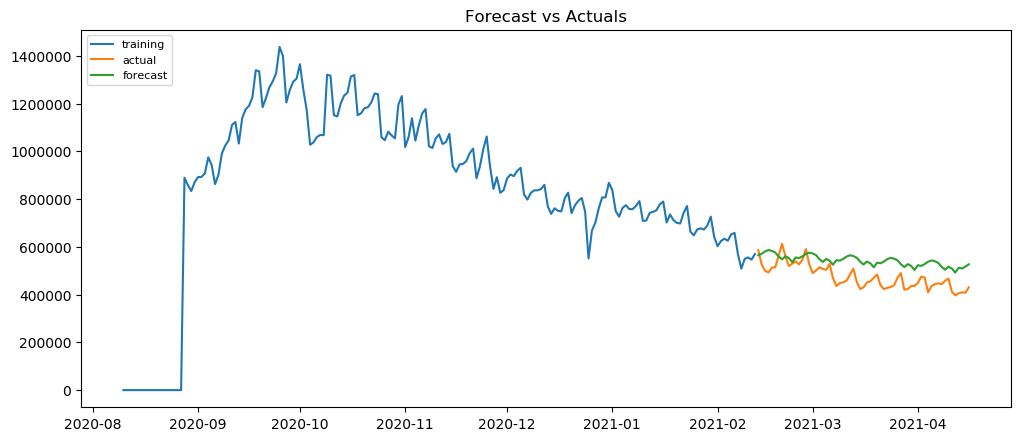

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6227.940, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6158.150, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6119.553, Time=0.34 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=6228.709, Time=0.09 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=6118.193, Time=0.59 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=6159.097, Time=0.31 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=6119.768, Time=2.53 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=6119.760, Time=2.93 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=6117.856, Time=1.24 sec
 ARIMA(0,1,1)(0,1,3)[12]             : AIC=6119.774, Time=2.19 sec
 ARIMA(0,1,1)(1,1,3)[12]             : AIC=6120.480, Time=4.01 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=2.75 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=6118.289, Time=3.01 sec
 ARIMA(0,1,2)(0,1,2)[12]             : AIC=6074.208, Time=1.61 sec
 ARIMA(0,1,2)(0,1,1)[12]

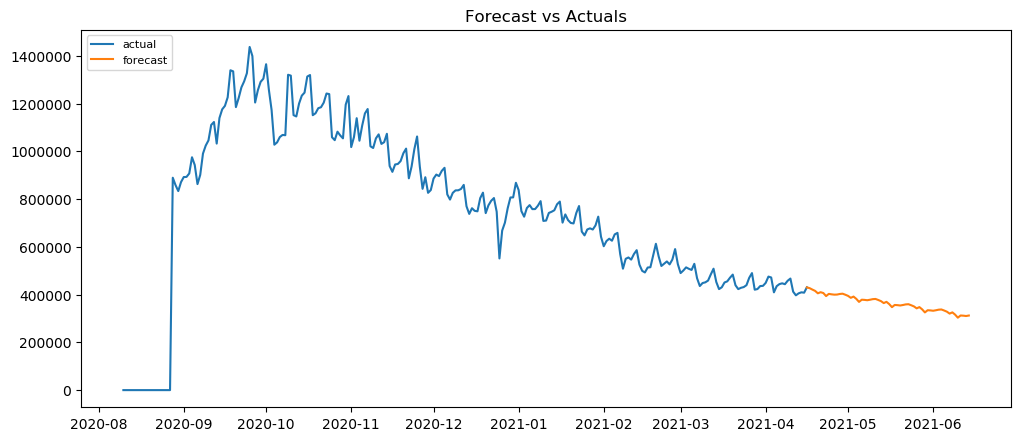

In [128]:
Lmd = pd.read_csv('./data/Lemonade (feat. Gunna, Don Toliver & NAV)_incremental.csv')
series = Lmd['us']
series.index = pd.to_datetime(Lmd['date'])
Arima_predict(series)
Arima_predict(series,test = False)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2934.606, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2885.959, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2868.973, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2920.545, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2870.838, Time=0.37 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2870.819, Time=0.71 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=2881.973, Time=0.21 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=2.43 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=2862.388, Time=0.18 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=2862.568, Time=0.43 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=1.00 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=2886.892, Time=0.15 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=2.92 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2873.554, Time=0.30 sec
 ARIMA(1,1,1)(0,1,1)[12]          

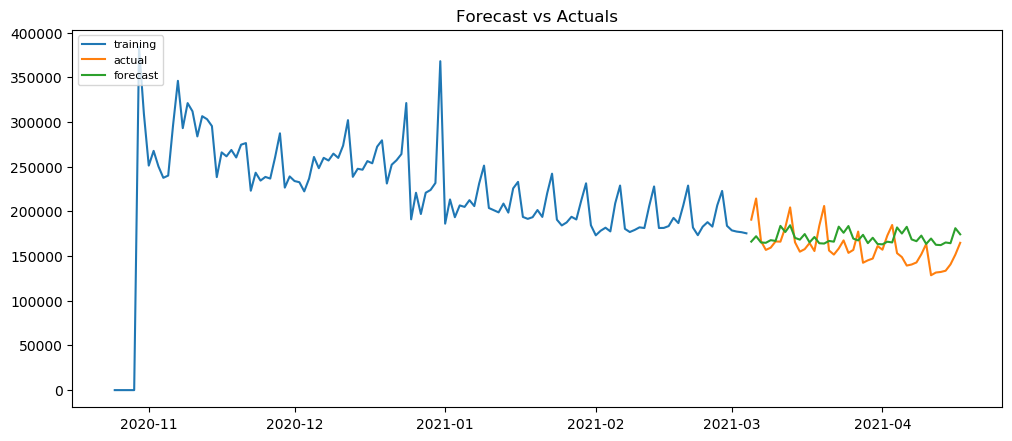

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3992.308, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3925.922, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=3899.004, Time=0.30 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=3973.004, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=3900.836, Time=0.38 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=3900.803, Time=0.93 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=3920.056, Time=0.29 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=3902.636, Time=2.85 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=3888.246, Time=0.20 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=3887.905, Time=0.30 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=3924.590, Time=0.20 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.13 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=2.14 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=2.56 sec
 ARIMA(0,1,0)(2,1,0)[12]          

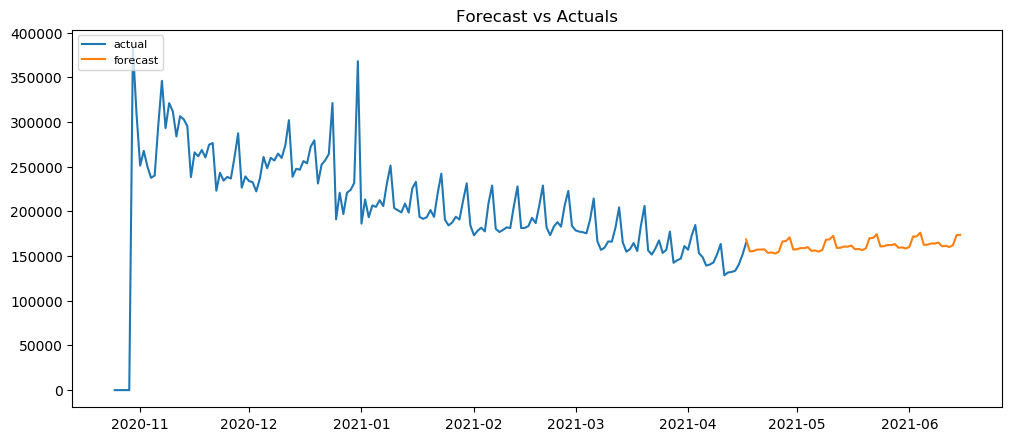

In [126]:
JB = pd.read_csv('./data/Fever_incremental.csv')
series1 = JB['fr']
series1.index = pd.to_datetime(JB['date'])
Arima_predict(series1)
Arima_predict(series1,test = False)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1919.219, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1857.710, Time=0.16 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1860.884, Time=0.23 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1888.261, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1857.053, Time=0.53 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1858.708, Time=0.83 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=1858.421, Time=0.67 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1856.423, Time=0.29 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=1856.132, Time=0.20 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=1856.577, Time=0.40 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=1858.422, Time=0.78 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=1858.281, Time=0.27 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=1856.694, Time=0.27 sec
 ARIMA(2,1,1)(0,1,1)[12]

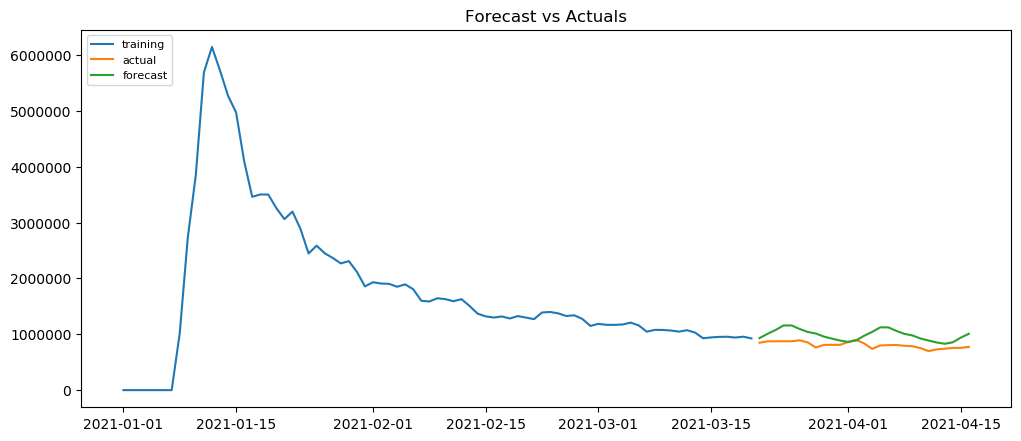

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2671.580, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2584.604, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2586.863, Time=0.30 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2628.660, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=2582.713, Time=0.65 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=2584.135, Time=0.96 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=2583.444, Time=0.83 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=2581.462, Time=0.34 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=2581.400, Time=0.23 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=2581.646, Time=0.53 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=2583.448, Time=1.00 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.36 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=2583.333, Time=0.29 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2580.581, Time=0.32 sec
 ARIMA(1,1,1)(0,1,0)[12]

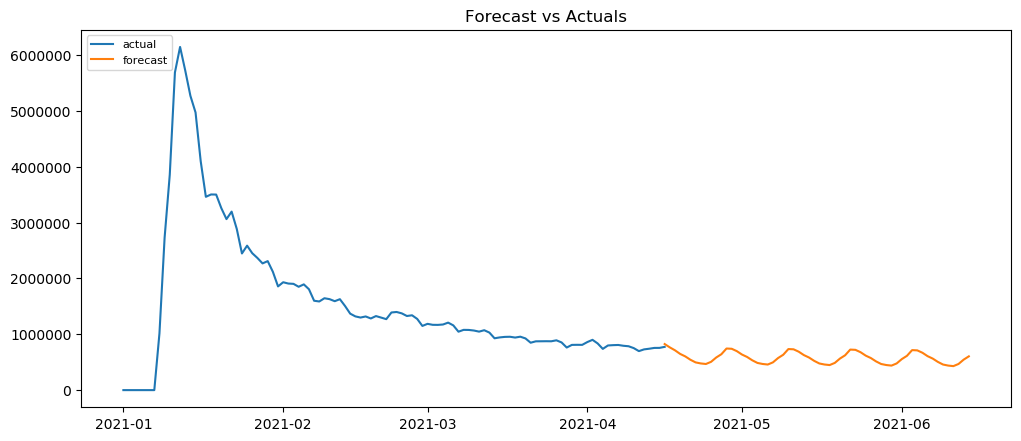

In [131]:
OR = pd.read_csv('./data/drivers license_incremental.csv')
series2 = OR['us']
series2.index = pd.to_datetime(OR['date'])
Arima_predict(series2)
Arima_predict(series2,test = False)